In [7]:
%load_ext autoreload
%load_ext notexbook
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

plt.style.use("../config/custom_plt.mplstyle")

colors = [
    "#7494d3",
    "#5cb545",
    "#9956c6",
    "#a7b338",
    "#6a6bc6",
    "#d09e40",
    "#ce62bb",
    "#56be85",
    "#d1477d",
    "#397f4d",
    "#cf4b4a",
    "#40bbc1",
    "#d8662c",
    "#99af66",
    "#b76989",
    "#6d7127",
    "#b6744a"
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The notexbook extension is already loaded. To reload it, use:
  %reload_ext notexbook
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.17 ms (started: 2023-03-28 17:08:00 +02:00)


In [8]:
# %texify --code-font-family Monaco --linespread 1.2 --code-font-size 13

time: 486 µs (started: 2023-03-28 17:08:00 +02:00)


In [9]:
df_homophily = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/homophily_datasets_new_with_metrics.csv")

time: 6.83 ms (started: 2023-03-28 17:08:01 +02:00)


In [10]:
df_similarity = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/similarity_datasets.csv")

time: 6.04 ms (started: 2023-03-28 17:08:01 +02:00)


In [11]:
df_all = df_homophily.merge(df_similarity)
# df_all = df_homophily
# removed_columns = ['acm', 'twitch_ru', 'twitch_de'] # datasets where beta could not be inferred (too low or too large)
# df_all = df_all[~df_all['dataset'].isin(removed_columns)]
df_all

,dataset,H_node,H_edge,C,l,r,k,similarity
0,citeseer,0.714119,0.736369,0.171070,9.310487,0.007137,3.476777,0.636876
1,cora,0.814498,0.804103,0.237636,6.310999,-0.071365,4.079678,0.685451
2,film,0.221966,0.219460,0.080193,4.110280,-0.046871,7.040000,0.387369
3,dblp,0.734636,0.744707,0.638952,3.476752,0.308222,31.442815,0.630028
4,imdb,0.462170,0.446323,0.526589,3.700298,0.468194,19.455390,0.490794
5,amazon_photo,0.848826,0.827205,0.410459,4.050997,-0.045047,31.799920,0.752339
6,cornell,0.118240,0.132143,0.167080,3.200564,-0.246913,3.060109,0.365983
7,wisconsin,0.170690,0.206009,0.207679,3.259952,-0.190340,3.713147,0.393578
8,texas,0.087281,0.111864,0.197926,3.036210,-0.264722,3.224044,0.355870
9,lastfm,0.833171,0.873876,0.219418,5.232237,0.017073,7.294334,0.714815


time: 18.4 ms (started: 2023-03-28 17:08:01 +02:00)


- 1  --  citeseer
- 2  --  cora
- 3  --  film
- 4  --  dblp
- 5  --  imdb
- ?  --  acm [x]
- 6  --  amazon_photo
- 7  --  cornell
- 8  --  wisconsin
- 9  --  texas
- 10  --  lastfm
- ?  --  twitch_ru [x]
- 11  --  twitch_ptbr
- 12  --  twitch_fr
- 13  --  twitch_es
- 14  --  twitch_engb
- ?  --  twitch_de [x]

In [12]:
from sklearn.preprocessing import LabelEncoder

def load_results(inf_coords_path, labels):
    inf_coords = pd.read_csv(inf_coords_path, comment="#", header=None, sep="\s+")
    inf_coords.columns = ['index', 'kappa', 'hyp_rad', 'p1', 'p2', 'p3']
    inf_coords = inf_coords.merge(labels, on="index")
    le = LabelEncoder()
    inf_coords['encoded_label'] = le.fit_transform(inf_coords['label'])
    inf_coords = inf_coords.drop_duplicates(subset=['index'])
    return inf_coords

time: 859 µs (started: 2023-03-28 17:08:03 +02:00)


In [14]:
citeseer_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer_GC_fixed.edge")

citeseer_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer_labels_umap_find_k.csv")
citeseer_labels['label'] = citeseer_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/umap"
citeseer_le_ml = load_results(f"{base_path}/le_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_umap_ml = load_results(f"{base_path}/umap_ml/citeseer_GC_fixed.inf_coord", citeseer_labels)
citeseer_only_umap = load_results(f"{base_path}/only_umap/citeseer_GC_fixed.inf_coord", citeseer_labels)

time: 65 ms (started: 2023-03-28 17:09:06 +02:00)


In [15]:
cora_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora_GC.edge")

cora_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora_labels_umap_find_k.csv")
cora_labels['label'] = cora_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/umap/"
cora_le_ml = load_results(f"{base_path}/le_ml/cora_GC.inf_coord", cora_labels)
cora_umap_ml = load_results(f"{base_path}/umap_ml/cora_GC.inf_coord", cora_labels)
cora_only_umap = load_results(f"{base_path}/only_umap/cora_GC.inf_coord", cora_labels)

time: 54.8 ms (started: 2023-03-28 17:09:26 +02:00)


In [16]:
film_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/out1_graph_edges.edge")

film_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film_labels_umap_find_k.csv")
film_labels['label'] = film_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/film/umap/"
film_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", film_labels)
film_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", film_labels)
film_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", film_labels)

time: 121 ms (started: 2023-03-28 17:09:52 +02:00)


In [17]:
dblp_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_pprefp/eS1/dblp_pprefp_GC.edge")

dblp_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp_labels_umap_find_k.csv")
dblp_labels['label'] = dblp_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/umap/"
dblp_le_ml = load_results(f"{base_path}/le_ml/dblp_pprefp_GC.inf_coord", dblp_labels)
dblp_umap_ml = load_results(f"{base_path}/umap_ml/dblp_pprefp_GC.inf_coord", dblp_labels)
dblp_only_umap = load_results(f"{base_path}/only_umap/dblp_pprefp_GC.inf_coord", dblp_labels)

time: 121 ms (started: 2023-03-28 17:10:13 +02:00)


In [18]:
imdb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_mam/eS1/imdb_mam_GC.edge")

imdb_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb_labels_umap_find_k.csv")
imdb_labels['label'] = imdb_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/umap/"
imdb_le_ml = load_results(f"{base_path}/le_ml/imdb_mam_GC.inf_coord", imdb_labels)
imdb_umap_ml = load_results(f"{base_path}/umap_ml/imdb_mam_GC.inf_coord", imdb_labels)
imdb_only_umap = load_results(f"{base_path}/only_umap/imdb_mam_GC.inf_coord", imdb_labels)

time: 99.3 ms (started: 2023-03-28 17:10:41 +02:00)


In [19]:
amazon_photo_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_GC.edge")

amazon_photo_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo_labels_umap_find_k.csv")
amazon_photo_labels['label'] = amazon_photo_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/umap/"
amazon_photo_le_ml = load_results(f"{base_path}/le_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_umap_ml = load_results(f"{base_path}/umap_ml/amazon_photo_GC.inf_coord", amazon_photo_labels)
amazon_photo_only_umap = load_results(f"{base_path}/only_umap/amazon_photo_GC.inf_coord", amazon_photo_labels)

time: 258 ms (started: 2023-03-28 17:11:12 +02:00)


In [20]:
cornell_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_graph_edges.edge")

cornell_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cornell_labels_umap_find_k.csv")
cornell_labels['label'] = cornell_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/umap/"
cornell_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", cornell_labels)
cornell_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", cornell_labels)

time: 40.1 ms (started: 2023-03-28 17:11:38 +02:00)


In [21]:
wisconsin_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_graph_edges.edge")

wisconsin_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/wisconsin_labels_umap_find_k.csv")
wisconsin_labels['label'] = wisconsin_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/umap/"
wisconsin_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", wisconsin_labels)
wisconsin_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", wisconsin_labels)

time: 24.8 ms (started: 2023-03-28 17:11:55 +02:00)


In [22]:
texas_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_graph_edges.edge")

texas_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/texas_labels_umap_find_k.csv")
texas_labels['label'] = texas_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/umap/"
texas_le_ml = load_results(f"{base_path}/le_ml/out1_graph_edges.inf_coord", texas_labels)
texas_umap_ml = load_results(f"{base_path}/umap_ml/out1_graph_edges.inf_coord", texas_labels)
texas_only_umap = load_results(f"{base_path}/only_umap/out1_graph_edges.inf_coord", texas_labels)

time: 25.5 ms (started: 2023-03-28 17:12:20 +02:00)


In [23]:
lastfm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_edges/eS1/lastfm_asia_edges.edge")

lastfm_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_labels_umap_find_k.csv")
lastfm_labels['label'] = lastfm_labels['label_clustering_find_k']

base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/umap/"
lastfm_le_ml = load_results(f"{base_path}/le_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_umap_ml = load_results(f"{base_path}/umap_ml/lastfm_asia_edges.inf_coord", lastfm_labels)
lastfm_only_umap = load_results(f"{base_path}/only_umap/lastfm_asia_edges.inf_coord", lastfm_labels)

time: 169 ms (started: 2023-03-28 17:12:40 +02:00)


In [24]:
twitch_ptbr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_edges.edge")

twitch_ptbr_labels = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch_ptbr_labels_umap_find_k.csv")
twitch_ptbr_labels['label'] = twitch_ptbr_labels['label_clustering_find_k']


base_path = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/umap/"
twitch_ptbr_le_ml = load_results(f"{base_path}/le_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_umap_ml = load_results(f"{base_path}/umap_ml/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)
twitch_ptbr_only_umap = load_results(f"{base_path}/only_umap/musae_PTBR_edges.inf_coord", twitch_ptbr_labels)

time: 116 ms (started: 2023-03-28 17:13:04 +02:00)


## Node classification

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


def node_classification(df_le_ml, df_umap_ml, df_only_umap, test_size=0.8, n_times=5):
    pos_le_ml = df_le_ml[['p1', 'p2', 'p3']].values
    pos_umap_ml = df_umap_ml[['p1', 'p2', 'p3']].values
    pos_only_umap = df_only_umap[['p1', 'p2', 'p3']].values
    
    f1_le_ml, accuracy_le_ml = [], []
    f1_umap_ml, accuracy_umap_ml = [], []
    f1_only_umap, accuracy_only_umap = [], []
    
    for _ in tqdm(range(n_times)):
        y_pred, y_true = predict_labels_kneighbours(pos_le_ml, df_le_ml['encoded_label'].values, test_size)
        f1_le_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_le_ml.append(accuracy_score(y_true, y_pred))

        y_pred, y_true = predict_labels_kneighbours(pos_umap_ml, df_umap_ml['encoded_label'].values, test_size)
        f1_umap_ml.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_umap_ml.append(accuracy_score(y_true, y_pred))
        
        y_pred, y_true = predict_labels_kneighbours(pos_only_umap, df_only_umap['encoded_label'].values, test_size)
        f1_only_umap.append(f1_score(y_true, y_pred, average='micro'))
        accuracy_only_umap.append(accuracy_score(y_true, y_pred))
        
    return {
        'f1_le_ml': f1_le_ml,
        'f1_umap_ml': f1_umap_ml,
        'f1_only_umap': f1_only_umap,
        'accuracy_le_ml': accuracy_le_ml,
        'accuracy_umap_ml': accuracy_umap_ml,
        'accuracy_only_umap': accuracy_only_umap
    }


def predict_labels(pos, labels, test_size):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    predicted_labels = []

    for p_test in tqdm(pos_test):
        smallest_angle = 1e8
        smallest_idx = 0
        for i, p_train in enumerate(pos_train):
            angle = np.arccos(np.dot(p_test, p_train) / (np.linalg.norm(p_test) * np.linalg.norm(p_train)))
            if angle < smallest_angle:
                smallest_angle = angle
                smallest_idx = i
        predicted_labels.append(labels_train[smallest_idx])

    predicted_labels = np.array(predicted_labels)
    return predicted_labels, labels_test



def predict_labels_kneighbours(pos, labels, test_size, k_neighbours=5):
    pos_train, pos_test, labels_train, labels_test = train_test_split(pos, labels, test_size=test_size)
    
    neigh = KNeighborsClassifier(n_neighbors=k_neighbours, metric=compute_angle)
    neigh.fit(pos_train, labels_train)
    
    predicted_labels = neigh.predict(pos_test)
    return predicted_labels, labels_test
    
    
def compute_angle(p1, p2):
    return np.arccos(np.clip(np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2)), -1, 1))

time: 127 ms (started: 2023-03-28 17:13:21 +02:00)


In [27]:
%%time

citeseer_nc = node_classification(citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap)
cora_nc = node_classification(cora_le_ml, cora_umap_ml, cora_only_umap)
film_nc = node_classification(film_le_ml, film_umap_ml, film_only_umap)
dblp_nc = node_classification(dblp_le_ml, dblp_umap_ml, dblp_only_umap)
imdb_nc = node_classification(imdb_le_ml, imdb_umap_ml, imdb_only_umap)
amazon_photo_nc = node_classification(amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap)
cornell_nc = node_classification(cornell_le_ml, cornell_umap_ml, cornell_only_umap)
wisconsin_nc = node_classification(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap)
texas_nc = node_classification(texas_le_ml, texas_umap_ml, texas_only_umap)
lastfm_nc = node_classification(lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap)
twitch_ptbr_nc = node_classification(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap)

100%|██████████| 5/5 [01:07<00:00, 13.50s/it]

CPU times: user 24min 17s, sys: 513 ms, total: 24min 17s
Wall time: 24min 25s
time: 24min 25s (started: 2023-03-28 17:13:23 +02:00)


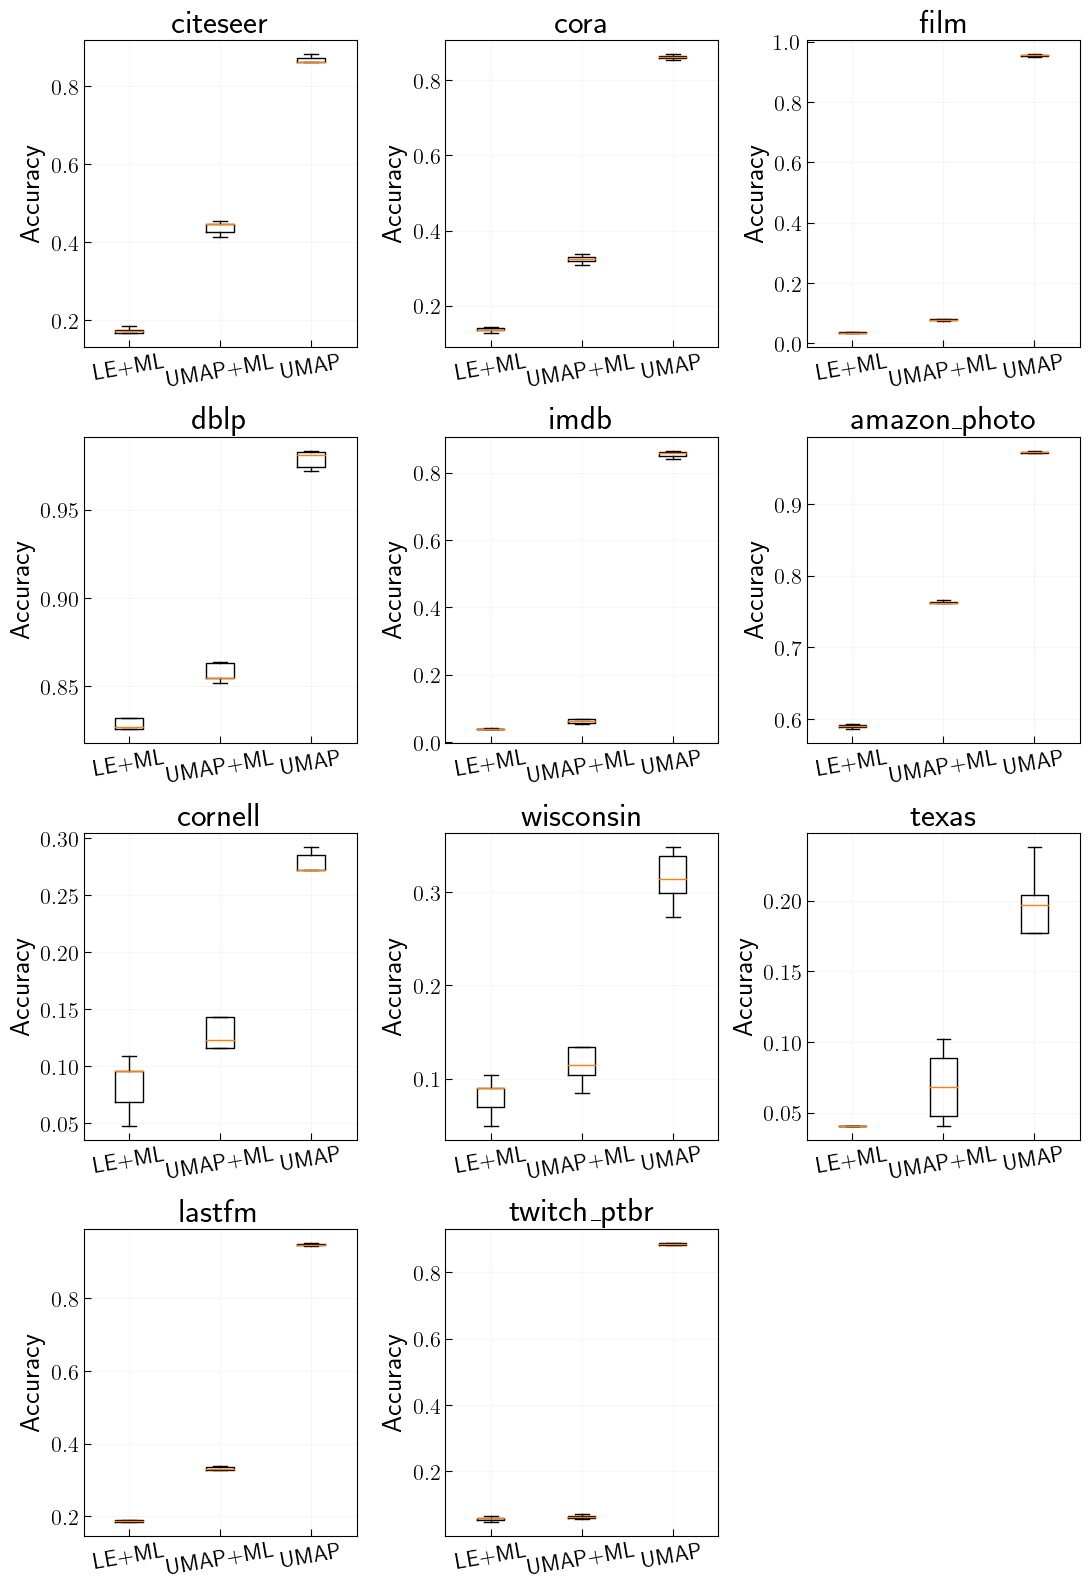

time: 1.4 s (started: 2023-03-28 17:37:49 +02:00)


In [28]:
def plot_nc_per_dataset(nc, title):
    plt.boxplot([nc['accuracy_le_ml'], nc['accuracy_umap_ml'], nc['accuracy_only_umap']], showfliers=False)
    plt.xticks([1, 2, 3], ['LE+ML', 'UMAP+ML', 'UMAP'], rotation=10)
    plt.ylabel('Accuracy')
    plt.title(title)
    
plt.figure(figsize=(11, 16))

plt.subplot(4, 3, 1)
plot_nc_per_dataset(citeseer_nc, 'citeseer')
plt.subplot(4, 3, 2)
plot_nc_per_dataset(cora_nc, 'cora')
plt.subplot(4, 3, 3)
plot_nc_per_dataset(film_nc, 'film')
plt.subplot(4, 3, 4)
plot_nc_per_dataset(dblp_nc, 'dblp')
plt.subplot(4, 3, 5)
plot_nc_per_dataset(imdb_nc, 'imdb')
plt.subplot(4, 3, 6)
plot_nc_per_dataset(amazon_photo_nc, 'amazon_photo')
plt.subplot(4, 3, 7)
plot_nc_per_dataset(cornell_nc, 'cornell')
plt.subplot(4, 3, 8)
plot_nc_per_dataset(wisconsin_nc, 'wisconsin')
plt.subplot(4, 3, 9)
plot_nc_per_dataset(texas_nc, 'texas')
plt.subplot(4, 3, 10)
plot_nc_per_dataset(lastfm_nc, 'lastfm')
plt.subplot(4, 3, 11)
plot_nc_per_dataset(twitch_ptbr_nc, 'twitch_ptbr')

plt.tight_layout()

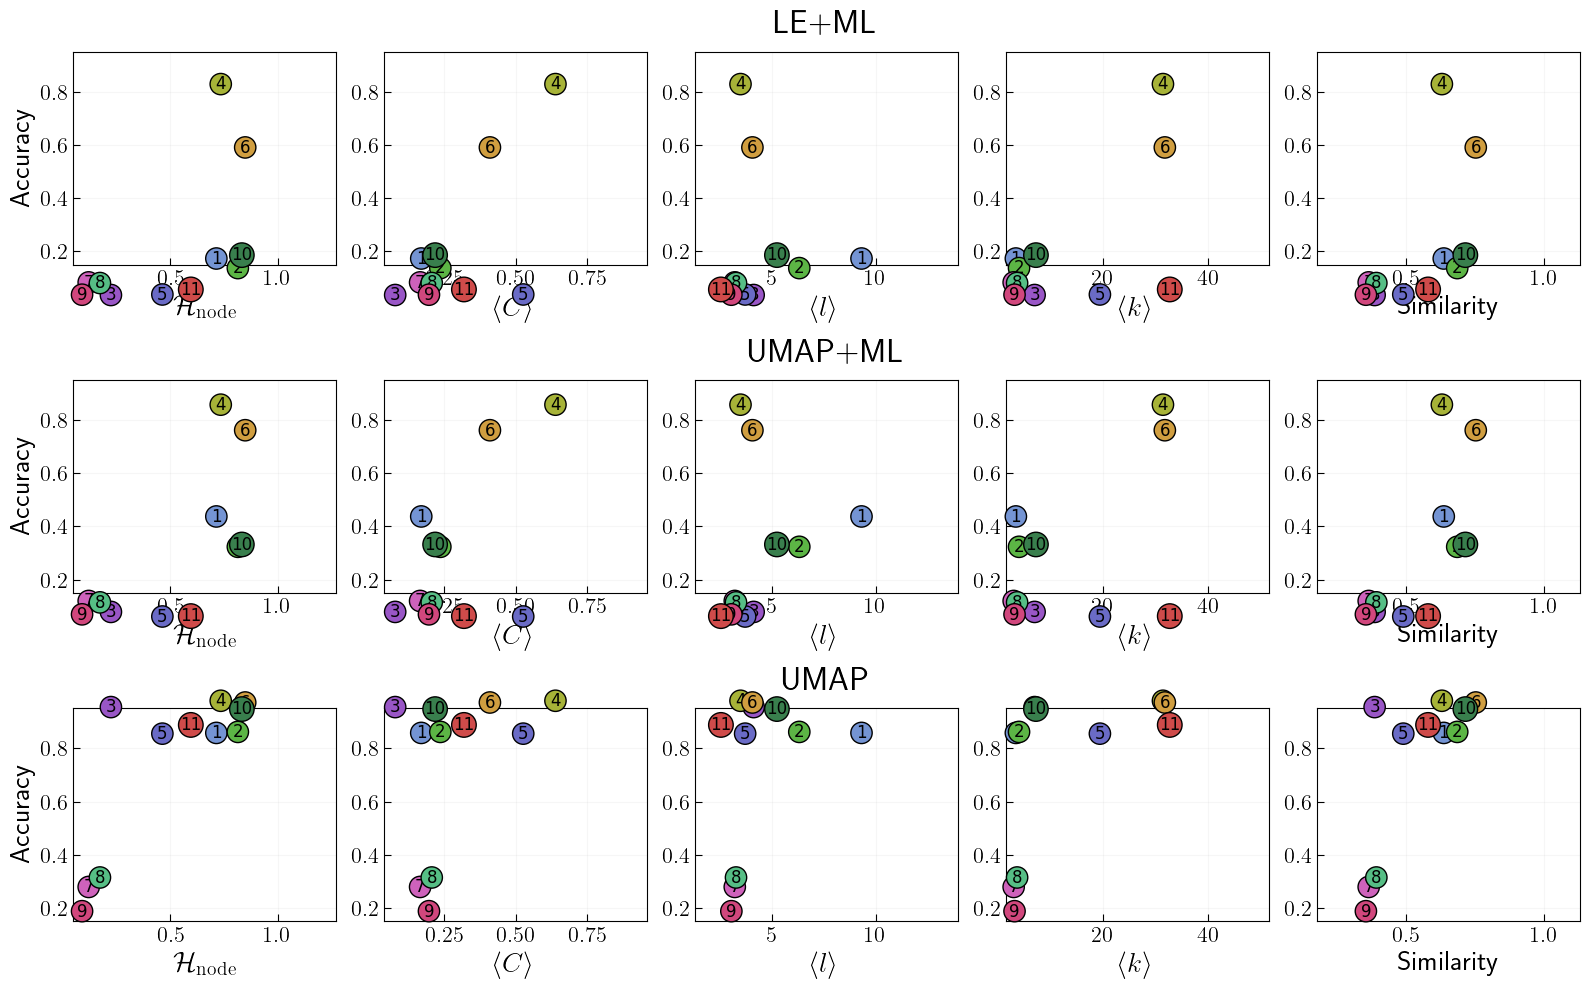

time: 1.55 s (started: 2023-03-28 17:37:50 +02:00)


In [29]:
nc_accuracy_le_ml = np.array([
    citeseer_nc['accuracy_le_ml'],
    cora_nc['accuracy_le_ml'],
    film_nc['accuracy_le_ml'],
    dblp_nc['accuracy_le_ml'],
    imdb_nc['accuracy_le_ml'],
    amazon_photo_nc['accuracy_le_ml'],
    cornell_nc['accuracy_le_ml'],
    wisconsin_nc['accuracy_le_ml'],
    texas_nc['accuracy_le_ml'],
    lastfm_nc['accuracy_le_ml'],
    twitch_ptbr_nc['accuracy_le_ml'],
])

nc_accuracy_umap_ml = np.array([
    citeseer_nc['accuracy_umap_ml'],
    cora_nc['accuracy_umap_ml'],
    film_nc['accuracy_umap_ml'],
    dblp_nc['accuracy_umap_ml'],
    imdb_nc['accuracy_umap_ml'],
    amazon_photo_nc['accuracy_umap_ml'],
    cornell_nc['accuracy_umap_ml'],
    wisconsin_nc['accuracy_umap_ml'],
    texas_nc['accuracy_umap_ml'],    
    lastfm_nc['accuracy_umap_ml'],
    twitch_ptbr_nc['accuracy_umap_ml'],
])

nc_accuracy_only_umap = np.array([
    citeseer_nc['accuracy_only_umap'],
    cora_nc['accuracy_only_umap'],
    film_nc['accuracy_only_umap'],
    dblp_nc['accuracy_only_umap'],
    imdb_nc['accuracy_only_umap'],
    amazon_photo_nc['accuracy_only_umap'],
    cornell_nc['accuracy_only_umap'],
    wisconsin_nc['accuracy_only_umap'],
    texas_nc['accuracy_only_umap'],
    lastfm_nc['accuracy_only_umap'],
    twitch_ptbr_nc['accuracy_only_umap'],
])

def plot_box_plot_per_option(nc_res, col):
    datasets = list(range(1, 15))
    for mean_acc, std_acc, h, c, name in zip(np.mean(nc_res, axis=1), np.std(nc_res, axis=1),
                                             df_all[col], colors, datasets):
        #plt.errorbar(h, mean_acc, yerr=std_acc, color=c, fmt='o')
        plt.text(h, mean_acc, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(0.15, 0.95)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_all_options_per_type(nc_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity') # previously it was: 'r'
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_all_options_per_type(nc_accuracy_le_ml, 'LE+ML', i=1)
plot_all_options_per_type(nc_accuracy_umap_ml, 'UMAP+ML', i=6)
plot_all_options_per_type(nc_accuracy_only_umap, 'UMAP', i=11)
plt.tight_layout()


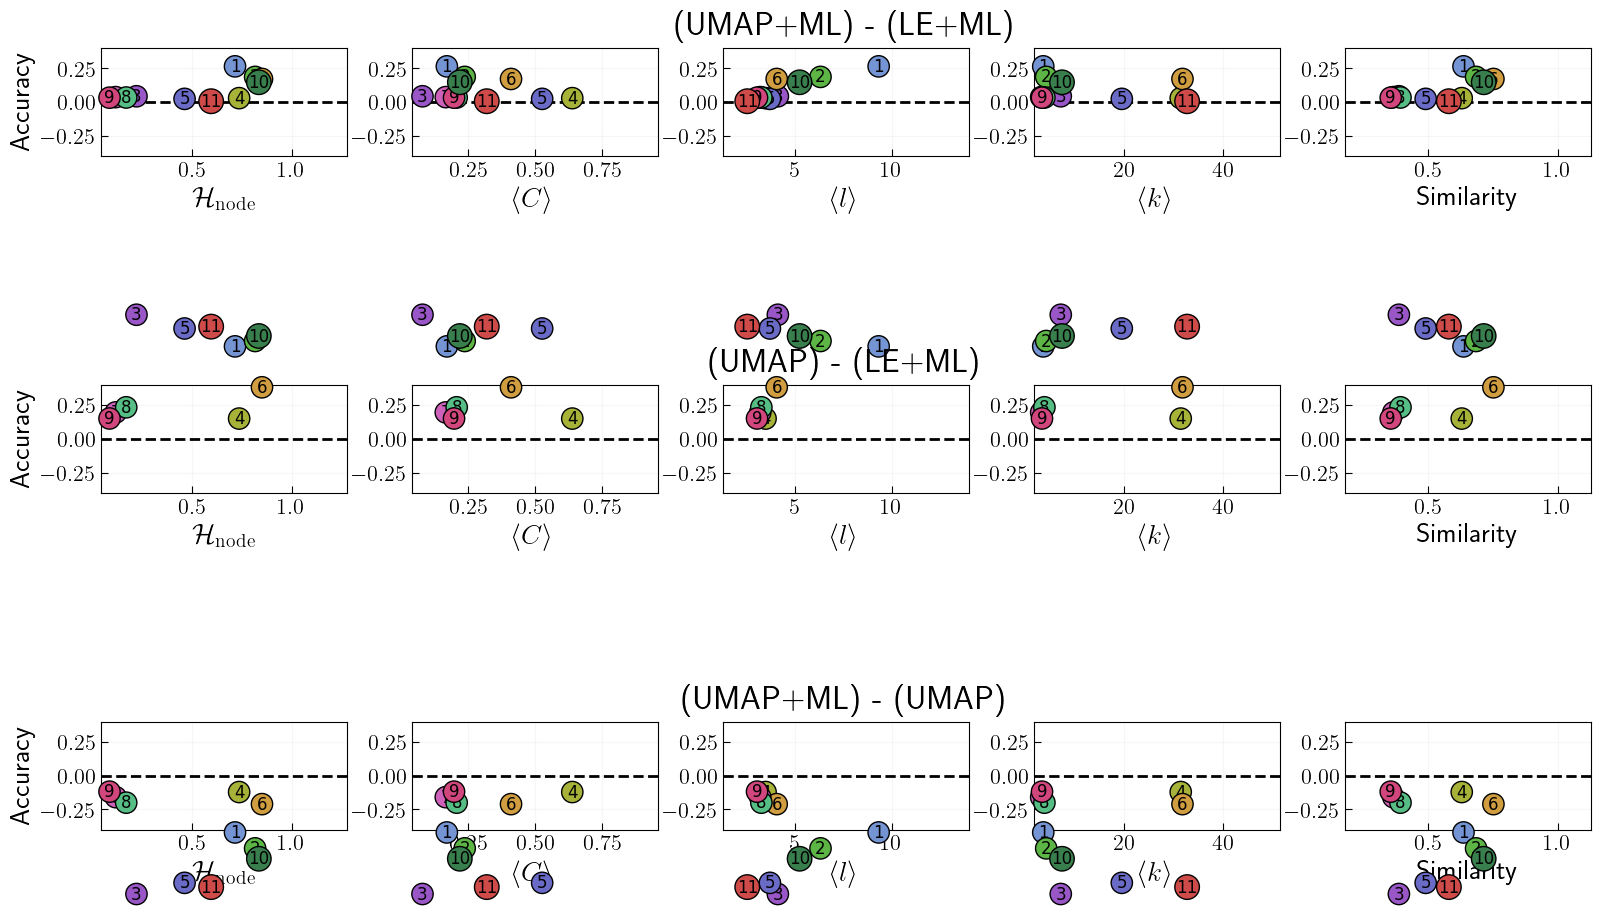

time: 2.23 s (started: 2023-03-28 17:37:52 +02:00)


In [30]:
def plot_all_options_difference(nc_res, title, ymin, ymax, i=1):
    plt.subplot(3, 5, i)
    plot_box_plot_per_option(nc_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel('Accuracy')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_box_plot_per_option(nc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_box_plot_per_option(nc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_box_plot_per_option(nc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_box_plot_per_option(nc_res, 'similarity') # it was 'r' previously
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_all_options_difference(nc_accuracy_umap_ml - nc_accuracy_le_ml, title='(UMAP+ML) - (LE+ML)', i=1, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_only_umap - nc_accuracy_le_ml, title='(UMAP) - (LE+ML)', i=6, ymin=-0.4, ymax=0.4)
plot_all_options_difference(nc_accuracy_umap_ml - nc_accuracy_only_umap, title='(UMAP+ML) - (UMAP)', i=11, ymin=-0.4, ymax=0.4)
plt.tight_layout()


In [34]:
# import pickle

# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_le_ml_umap_labels.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_le_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_umap_ml_umap_labels.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_umap_ml, f)


# with open("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/node_classification_only_umap_umap_labels.dat", 'wb') as f:
#     pickle.dump(nc_accuracy_only_umap, f)
    

time: 498 µs (started: 2023-03-28 17:39:49 +02:00)


## Community concentration

In [35]:
%load_ext Cython

time: 321 ms (started: 2023-03-24 20:04:34 +01:00)


In [36]:
%%cython --compile-args=-ffast-math --compile-args=-funroll-loops --compile-args=-ftree-loop-distribution --compile-args=-mtune=native
# distutils: language = c++

cimport cython
cimport numpy as np
import numpy as np
from libcpp.vector cimport vector
from libcpp cimport bool

from libc.math cimport exp, pi, cos, sin, sqrt, pow, acos
    
cdef class FractionNodesVsNeighbours:
    
    cdef int dim, n_labels
    cdef list labels, nodes
    cdef public np.float64_t[:, :] distance_matrix
    cdef public np.float64_t[:] cluster_probabilities
    
    
    def __init__(self, int dim, np.float64_t[:, :] positions, np.float64_t[:] thetas, list labels):
        # NOTE: list of labels should start with 0 and go to (n_labels - 1)
        self.dim = dim
        self.distance_matrix = self.get_distance_matrix(dim, positions, thetas)
        self.labels = labels
        self.nodes = list(np.arange(len(labels)))
        self.n_labels = len(set(self.labels))
        self.compute_probability_per_label()
        
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    @cython.cdivision      
    cdef compute_probability_per_label(self):
        cdef dict n_nodes_per_group = {}
        for i, l in enumerate(self.labels):
            if l not in n_nodes_per_group:
                n_nodes_per_group[l] = 0
            n_nodes_per_group[l] += 1
            
        self.cluster_probabilities = np.zeros(self.n_labels)    
        for l, v in n_nodes_per_group.items():
            self.cluster_probabilities[l] = v / len(self.labels)
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    def compute_fraction_nodes_vs_neighbours_all_classes(self, int num_n_neighbours=30):
        """
        Format of the output
        
        [{n_neighbours_1: [results for the n_neigbours, ..]}, {}, ...]
        """
        cdef dict results = {}
        all_n_neighbours = np.linspace(2, len(self.nodes), num=num_n_neighbours).astype(int)        
        for n_neighbours in all_n_neighbours:
            results[n_neighbours] = self.iterate_over_nodes(self.nodes, n_neighbours)
        return results
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    def compute_fraction_nodes_vs_neighbours_per_class(self, int num_n_neighbours=30):
        """
        Format of the output
        
        {label_1: [{n_neighbours_1: [results for the n_neigbours, ..]}, {}, ...],
         label_2: ...}
        """
        cdef dict nodes_per_group = {}    
        for i, l in enumerate(self.labels):
            if l not in nodes_per_group:
                nodes_per_group[l] = []
            nodes_per_group[l].append(i)

        cdef dict results = {}
        cdef dict res = {}
        # Start with a node and its neighbour (not with 1)
        all_n_neighbours = np.linspace(2, len(self.nodes), num=num_n_neighbours).astype(int)
        for l, nodes_to_consider in nodes_per_group.items():
            res = {}
            for n_neighbours in all_n_neighbours:
                res[n_neighbours] = self.iterate_over_nodes(nodes_to_consider, n_neighbours)
            results[l] = res
            print(f'Done for class {l}/{self.n_labels}')
        return results

    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    @cython.cdivision
    cdef iterate_over_nodes(self, list nodes_to_consider, int n_neighbours):
        all_fraction = []
        for n1 in nodes_to_consider:
            neighbours = []
            for n2 in self.nodes:
                # Here I iterate over the same node, i.e., distance=0
                neighbours.append((self.distance_matrix[n1, n2], self.labels[n2]))
            
            neighbours = sorted(neighbours, key=lambda x: x[0])
            neighbours = [x[1] for x in neighbours[:n_neighbours]]
            
            l1 = self.labels[n1]
            fraction = neighbours.count(l1) / n_neighbours
            # Weighted by the cluster probability (size of the cluster)
            all_fraction.append(fraction / self.cluster_probabilities[l1])
        return all_fraction

    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix(self, int dim, np.float64_t[:, :] positions, np.float64_t[:] thetas):
        if dim == 1:
            return self.get_distance_matrix_S1(thetas)
        else:
            return self.get_distance_matrix_SD(dim, positions)
        
        
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix_S1(self, np.float64_t[:] thetas):
        cdef int size = len(thetas)
        cdef np.float64_t[:, :] mat = np.empty((size, size))
        for i in range(size):
            for j in range(size):
                angle = pi - abs(pi - abs(thetas[i] - thetas[j]))
                mat[i, j] = angle
                mat[j, i] = angle
        return mat
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef get_distance_matrix_SD(self, int dim, np.float64_t[:, :] positions):
        cdef int size = positions.shape[0]
        cdef np.float64_t[:, :] mat = np.empty((size, size))
        for i in range(size):
            for j in range(size):
                angle = self.compute_angle_vectors(dim, positions[i], positions[j])
                mat[i, j] = angle
                mat[j, i] = angle
        return mat
    
    
    @cython.boundscheck(False)
    @cython.wraparound(False)
    cdef compute_angle_vectors(self, int dim, np.float64_t[:] v1, np.float64_t[:] v2):
        cdef float angle = 0, norm1 = 0, norm2 = 0
        for i in range(dim + 1): 
            angle += v1[i] * v2[i]
            norm1 += v1[i] * v1[i]
            norm2 += v2[i] * v2[i]
        
        norm1 /= sqrt(norm1)
        norm2 /= sqrt(norm2)
        cdef float result = angle / (norm1 * norm2)
        if (abs(result - 1) < 1e-10):
            return 0.0
        else:
            return acos(result)

time: 185 ms (started: 2023-03-24 20:04:34 +01:00)


In [37]:
def compute_fraction_nodes_vs_neighbours(df_le_ml, df_umap_ml, df_only_umap, resolution=50):
    xy = FractionNodesVsNeighbours(2, 
                                   df_le_ml[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_le_ml['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_le_ml = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('LE+ML done.')
    
    xy = FractionNodesVsNeighbours(2, 
                                   df_umap_ml[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_umap_ml['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_umap_ml = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('UMAP+ML done.')
    
    xy = FractionNodesVsNeighbours(2, 
                                   df_only_umap[['p1', 'p2', 'p3']].values, 
                                   np.array([0.]), 
                                   (df_only_umap['encoded_label'].values).tolist())
    fraction_vs_n_neighbours_only_umap = xy.compute_fraction_nodes_vs_neighbours_all_classes(resolution)
    print('UMAP done.')
    
    return {
        'fraction_vs_n_neighbours_le_ml': fraction_vs_n_neighbours_le_ml,
        'fraction_vs_n_neighbours_umap_ml': fraction_vs_n_neighbours_umap_ml,
        'fraction_vs_n_neighbours_only_umap': fraction_vs_n_neighbours_only_umap
    }

time: 1.09 ms (started: 2023-03-24 20:04:35 +01:00)


In [38]:
citeseer_cc = compute_fraction_nodes_vs_neighbours(citeseer_le_ml, citeseer_umap_ml, citeseer_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 8min 58s (started: 2023-03-24 20:04:35 +01:00)


In [39]:
cora_cc = compute_fraction_nodes_vs_neighbours(cora_le_ml, cora_umap_ml, cora_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 4min 22s (started: 2023-03-24 20:13:33 +01:00)


In [40]:
film_cc = compute_fraction_nodes_vs_neighbours(film_le_ml, film_umap_ml, film_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 2d 12min 6s (started: 2023-03-24 20:17:55 +01:00)


In [41]:
dblp_cc = compute_fraction_nodes_vs_neighbours(dblp_le_ml, dblp_umap_ml, dblp_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 1h 56min 8s (started: 2023-03-26 21:30:02 +02:00)


In [42]:
imdb_cc = compute_fraction_nodes_vs_neighbours(imdb_le_ml, imdb_umap_ml, imdb_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 19min 38s (started: 2023-03-26 23:26:10 +02:00)


In [44]:
amazon_photo_cc = compute_fraction_nodes_vs_neighbours(
    amazon_photo_le_ml, amazon_photo_umap_ml, amazon_photo_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 47min 5s (started: 2023-03-27 09:34:57 +02:00)


In [45]:
cornell_cc = compute_fraction_nodes_vs_neighbours(cornell_le_ml, cornell_umap_ml, cornell_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 774 ms (started: 2023-03-27 10:22:02 +02:00)


In [46]:
wisconsin_cc = compute_fraction_nodes_vs_neighbours(wisconsin_le_ml, wisconsin_umap_ml, wisconsin_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 1.55 s (started: 2023-03-27 10:22:03 +02:00)


In [47]:
texas_cc = compute_fraction_nodes_vs_neighbours(texas_le_ml, texas_umap_ml, texas_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 793 ms (started: 2023-03-27 10:22:04 +02:00)


In [48]:
lastfm_cc = compute_fraction_nodes_vs_neighbours(lastfm_le_ml, lastfm_umap_ml, lastfm_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 53min 37s (started: 2023-03-27 10:22:05 +02:00)


In [49]:
twitch_ptbr_cc = compute_fraction_nodes_vs_neighbours(twitch_ptbr_le_ml, twitch_ptbr_umap_ml, twitch_ptbr_only_umap)

LE+ML done.
UMAP+ML done.
UMAP done.
time: 4min 30s (started: 2023-03-27 11:15:43 +02:00)


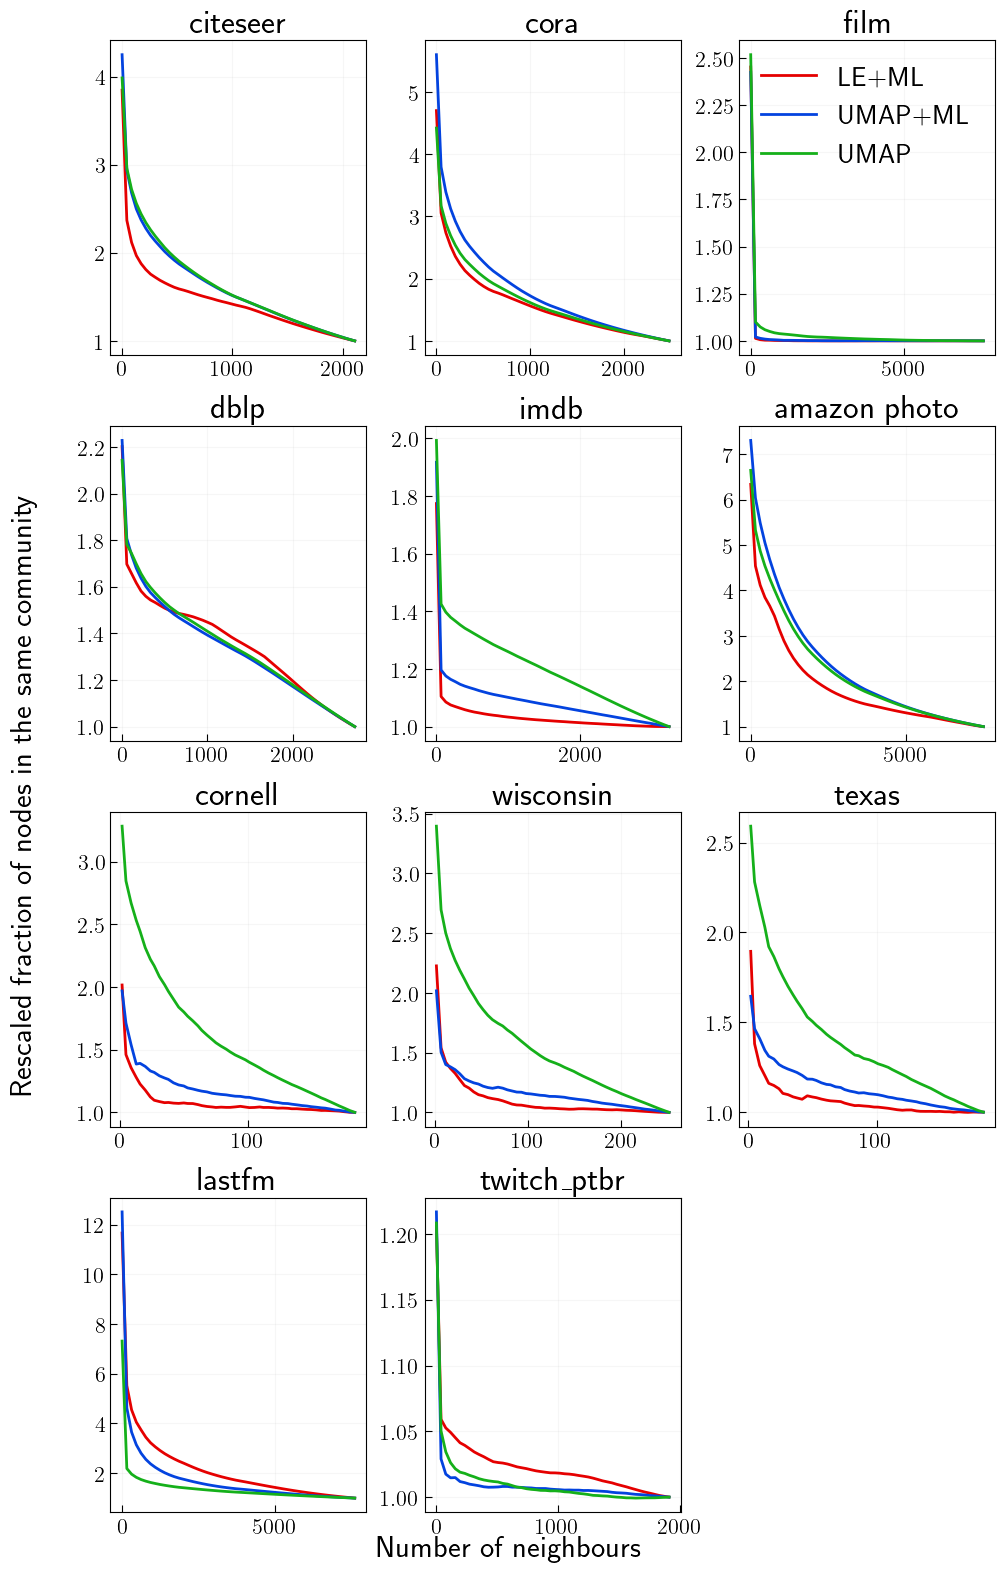

time: 1.33 s (started: 2023-03-27 11:20:13 +02:00)


In [50]:
def plot_fraction_of_nodes_in_community_per_dataset(cc, title):
    plt.plot(cc['fraction_vs_n_neighbours_le_ml'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_le_ml'].values()], 
             label='LE+ML', color='xkcd:red')
    plt.plot(cc['fraction_vs_n_neighbours_umap_ml'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_umap_ml'].values()], 
             label='UMAP+ML', color='xkcd:blue')
    plt.plot(cc['fraction_vs_n_neighbours_only_umap'].keys(), 
             [np.mean(x) for x in cc['fraction_vs_n_neighbours_only_umap'].values()], 
             label='UMAP', color='xkcd:green')
    plt.title(title)
    
    
plt.figure(figsize=(10, 16))

plt.subplot(4, 3, 1)
plot_fraction_of_nodes_in_community_per_dataset(citeseer_cc, 'citeseer')
plt.subplot(4, 3, 2)
plot_fraction_of_nodes_in_community_per_dataset(cora_cc, 'cora')
plt.subplot(4, 3, 3)
plot_fraction_of_nodes_in_community_per_dataset(film_cc, 'film')
plt.legend(loc='upper right', fontsize=20)
plt.subplot(4, 3, 4)
plot_fraction_of_nodes_in_community_per_dataset(dblp_cc, 'dblp')
plt.subplot(4, 3, 5)
plot_fraction_of_nodes_in_community_per_dataset(imdb_cc, 'imdb')
plt.subplot(4, 3, 6)
plot_fraction_of_nodes_in_community_per_dataset(amazon_photo_cc, 'amazon photo')
plt.subplot(4, 3, 7)
plot_fraction_of_nodes_in_community_per_dataset(cornell_cc, 'cornell')
plt.subplot(4, 3, 8)
plot_fraction_of_nodes_in_community_per_dataset(wisconsin_cc, 'wisconsin')
plt.subplot(4, 3, 9)
plot_fraction_of_nodes_in_community_per_dataset(texas_cc, 'texas')
plt.subplot(4, 3, 10)
plot_fraction_of_nodes_in_community_per_dataset(lastfm_cc, 'lastfm')
plt.subplot(4, 3, 11)
plot_fraction_of_nodes_in_community_per_dataset(twitch_ptbr_cc, 'twitch_ptbr')

fig = plt.gcf()
fig.supxlabel(r'Number of neighbours', fontsize=22, y=0.02)
fig.supylabel('Rescaled fraction of nodes in the same community', fontsize=22, x=0)

plt.tight_layout()

In [51]:
def get_community_concentration(cc, df):
    closest_val = min(cc['fraction_vs_n_neighbours_le_ml'].keys(), key=lambda x: abs(x - 0.1*len(df)))
    cc_le_ml = np.mean(cc['fraction_vs_n_neighbours_le_ml'][closest_val])
    cc_umap_ml = np.mean(cc['fraction_vs_n_neighbours_umap_ml'][closest_val])
    cc_only_umap = np.mean(cc['fraction_vs_n_neighbours_only_umap'][closest_val])
    
    C = len(np.unique(df['encoded_label'])) # number of communities
    
    return {
        'cc_le_ml': cc_le_ml / C,
        'cc_umap_ml': cc_umap_ml / C,
        'cc_only_umap': cc_only_umap / C
    }
    

citeseer_cc_0_1 = get_community_concentration(citeseer_cc, citeseer_le_ml)
cora_cc_0_1 = get_community_concentration(cora_cc, cora_le_ml)
film_cc_0_1 = get_community_concentration(film_cc, film_le_ml)
dblp_cc_0_1 = get_community_concentration(dblp_cc, dblp_le_ml)
imdb_cc_0_1 = get_community_concentration(imdb_cc, imdb_le_ml)
amazon_photo_cc_0_1 = get_community_concentration(amazon_photo_cc, amazon_photo_le_ml)
cornell_cc_0_1 = get_community_concentration(cornell_cc, cornell_le_ml)
wisconsin_cc_0_1 = get_community_concentration(wisconsin_cc, wisconsin_le_ml)
texas_cc_0_1 = get_community_concentration(texas_cc, texas_le_ml)
lastfm_cc_0_1 = get_community_concentration(lastfm_cc, lastfm_le_ml)
twitch_ptbr_cc_0_1 = get_community_concentration(twitch_ptbr_cc, twitch_ptbr_le_ml)

time: 18.1 ms (started: 2023-03-27 11:20:15 +02:00)


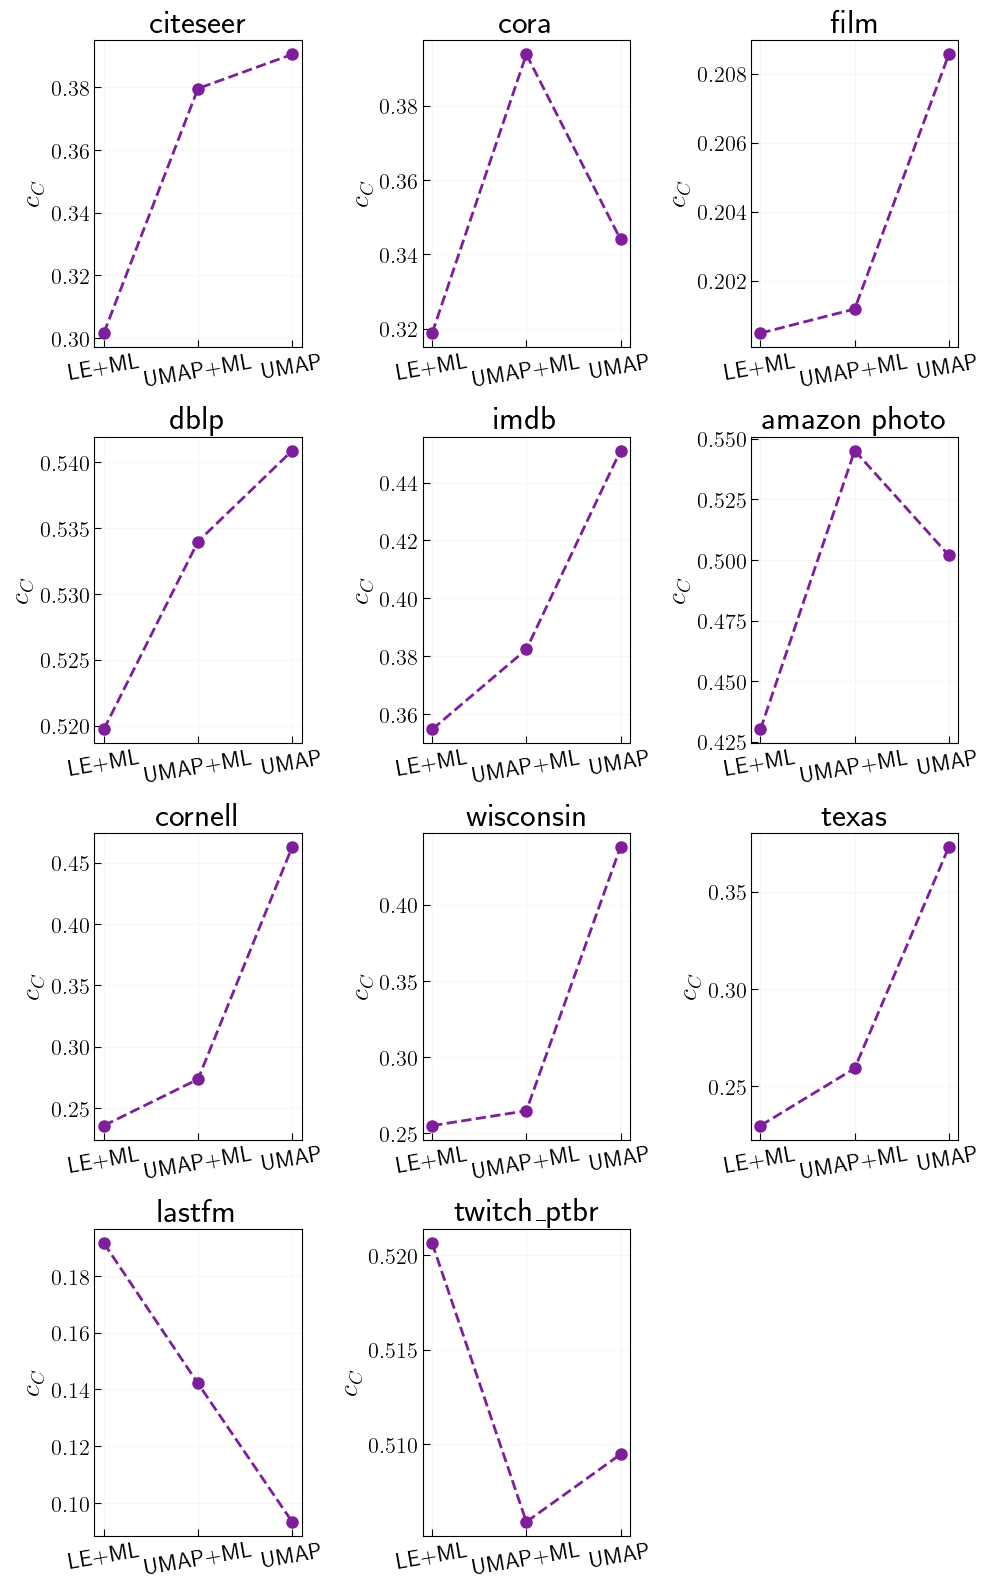

time: 832 ms (started: 2023-03-27 11:20:15 +02:00)


In [52]:
def plot_community_concentration_per_dataset(cc_0_1, title):
    plt.plot([cc_0_1['cc_le_ml'], cc_0_1['cc_umap_ml'], cc_0_1['cc_only_umap']], 
             color='xkcd:purple', marker='o', linestyle='--')
    plt.xticks([0, 1, 2], ['LE+ML', 'UMAP+ML', 'UMAP'], rotation=10)
    plt.ylabel(r'$c_C$')
    plt.title(title)
    
    
plt.figure(figsize=(10, 16))

plt.subplot(4, 3, 1)
plot_community_concentration_per_dataset(citeseer_cc_0_1, 'citeseer')
plt.subplot(4, 3, 2)
plot_community_concentration_per_dataset(cora_cc_0_1, 'cora')
plt.subplot(4, 3, 3)
plot_community_concentration_per_dataset(film_cc_0_1, 'film')
plt.subplot(4, 3, 4)
plot_community_concentration_per_dataset(dblp_cc_0_1, 'dblp')
plt.subplot(4, 3, 5)
plot_community_concentration_per_dataset(imdb_cc_0_1, 'imdb')
plt.subplot(4, 3, 6)
plot_community_concentration_per_dataset(amazon_photo_cc_0_1, 'amazon photo')
plt.subplot(4, 3, 7)
plot_community_concentration_per_dataset(cornell_cc_0_1, 'cornell')
plt.subplot(4, 3, 8)
plot_community_concentration_per_dataset(wisconsin_cc_0_1, 'wisconsin')
plt.subplot(4, 3, 9)
plot_community_concentration_per_dataset(texas_cc_0_1, 'texas')
plt.subplot(4, 3, 10)
plot_community_concentration_per_dataset(lastfm_cc_0_1, 'lastfm')
plt.subplot(4, 3, 11)
plot_community_concentration_per_dataset(twitch_ptbr_cc_0_1, 'twitch_ptbr')


plt.tight_layout()

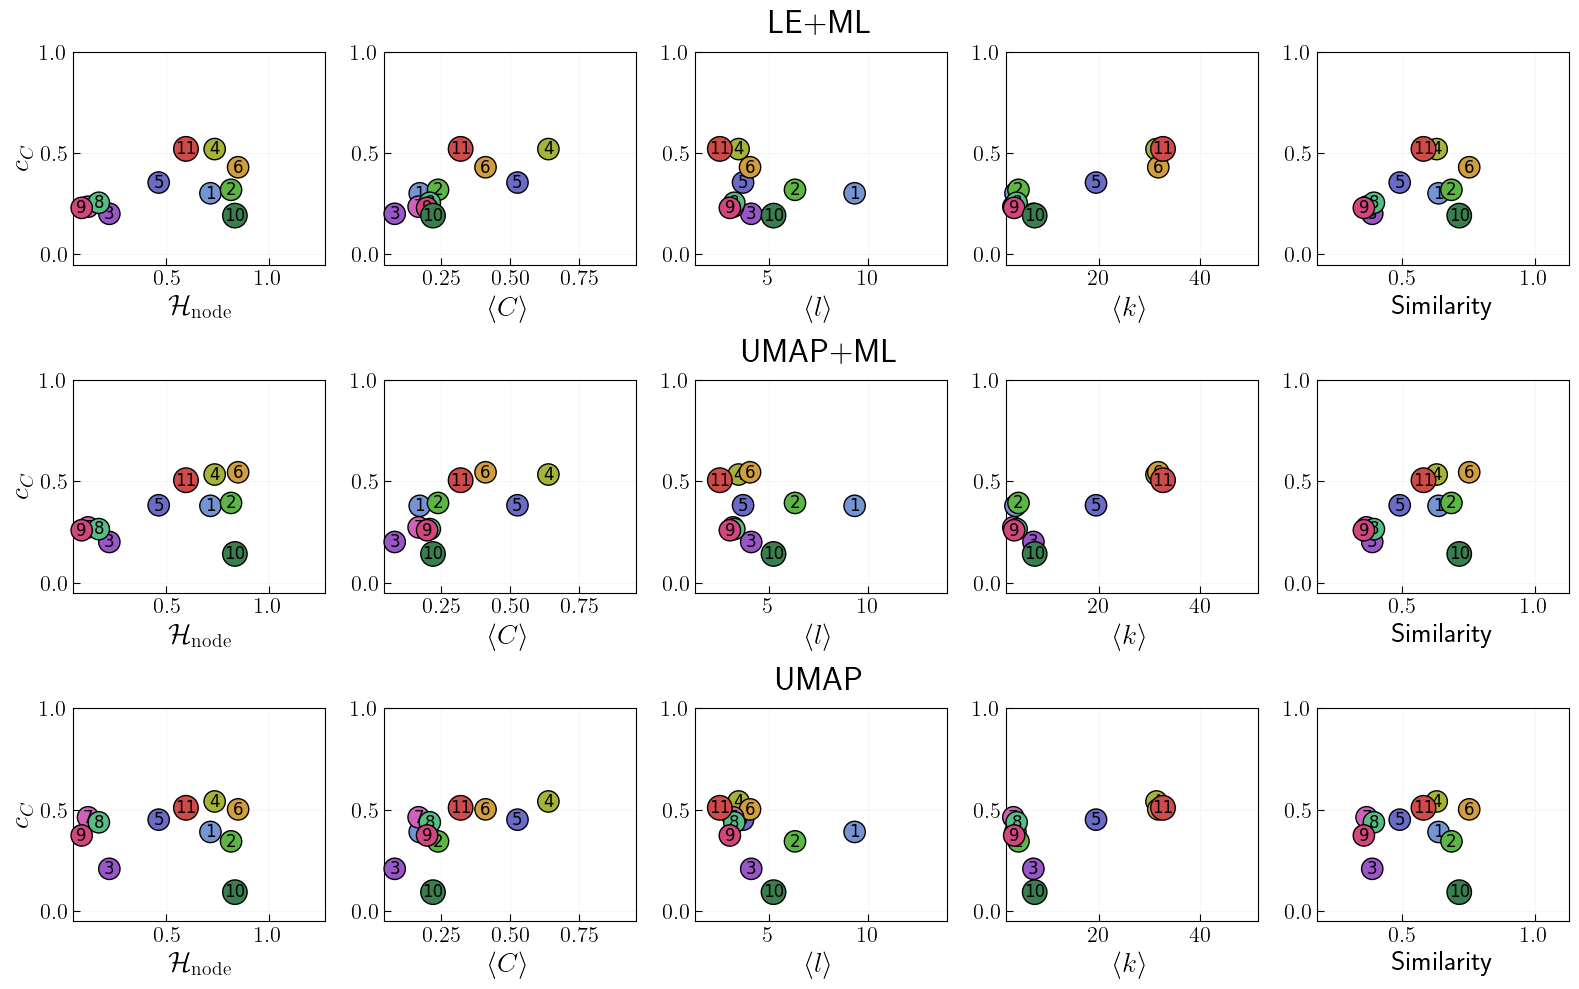

time: 1.71 s (started: 2023-03-27 11:20:15 +02:00)


In [53]:
cc_le_ml = np.array([
    citeseer_cc_0_1['cc_le_ml'],
    cora_cc_0_1['cc_le_ml'],
    film_cc_0_1['cc_le_ml'],
    dblp_cc_0_1['cc_le_ml'],
    imdb_cc_0_1['cc_le_ml'],
    amazon_photo_cc_0_1['cc_le_ml'],
    cornell_cc_0_1['cc_le_ml'],
    wisconsin_cc_0_1['cc_le_ml'],
    texas_cc_0_1['cc_le_ml'],
    lastfm_cc_0_1['cc_le_ml'],
    twitch_ptbr_cc_0_1['cc_le_ml'],
])

cc_umap_ml = np.array([
    citeseer_cc_0_1['cc_umap_ml'],
    cora_cc_0_1['cc_umap_ml'],
    film_cc_0_1['cc_umap_ml'],
    dblp_cc_0_1['cc_umap_ml'],
    imdb_cc_0_1['cc_umap_ml'],
    amazon_photo_cc_0_1['cc_umap_ml'],
    cornell_cc_0_1['cc_umap_ml'],
    wisconsin_cc_0_1['cc_umap_ml'],
    texas_cc_0_1['cc_umap_ml'],
    lastfm_cc_0_1['cc_umap_ml'],
    twitch_ptbr_cc_0_1['cc_umap_ml'],
])

cc_only_umap = np.array([
    citeseer_cc_0_1['cc_only_umap'],
    cora_cc_0_1['cc_only_umap'],
    film_cc_0_1['cc_only_umap'],
    dblp_cc_0_1['cc_only_umap'],
    imdb_cc_0_1['cc_only_umap'],
    amazon_photo_cc_0_1['cc_only_umap'],
    cornell_cc_0_1['cc_only_umap'],
    wisconsin_cc_0_1['cc_only_umap'],
    texas_cc_0_1['cc_only_umap'],
    lastfm_cc_0_1['cc_only_umap'],
    twitch_ptbr_cc_0_1['cc_only_umap'],
])


def plot_cc_per_option(cc_res, col):
    datasets = list(range(1, 15))
    for gr, h, c, name in zip(cc_res, df_all[col], colors, datasets):
        plt.text(h, gr, name, ha="center", va="center",
                 bbox = dict(boxstyle=f"circle,pad=0.1", fc=c), fontsize=12, usetex=False)
    plt.ylim(-0.05, 1)
    x = df_all[col]
    plt.xlim(min(x)-0.5*abs(min(x)), max(x)+0.5*abs(max(x)))
    
    
def plot_cc_all_options_per_type(cc_res, title, i=1):
    plt.subplot(3, 5, i)
    plot_cc_per_option(cc_res, 'H_node')
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel(r'$c_C$')

    plt.subplot(3, 5, i+1)
    plot_cc_per_option(cc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')

    plt.subplot(3, 5, i+2)
    plot_cc_per_option(cc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.title(title, y=1.05)

    plt.subplot(3, 5, i+3)
    plot_cc_per_option(cc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')

    plt.subplot(3, 5, i+4)
    plot_cc_per_option(cc_res, 'similarity')
    plt.xlabel(r'Similarity')
    

plt.figure(figsize=(16, 10))
plot_cc_all_options_per_type(cc_le_ml, 'LE+ML', i=1)
plot_cc_all_options_per_type(cc_umap_ml, 'UMAP+ML', i=6)
plot_cc_all_options_per_type(cc_only_umap, 'UMAP', i=11)
plt.tight_layout()


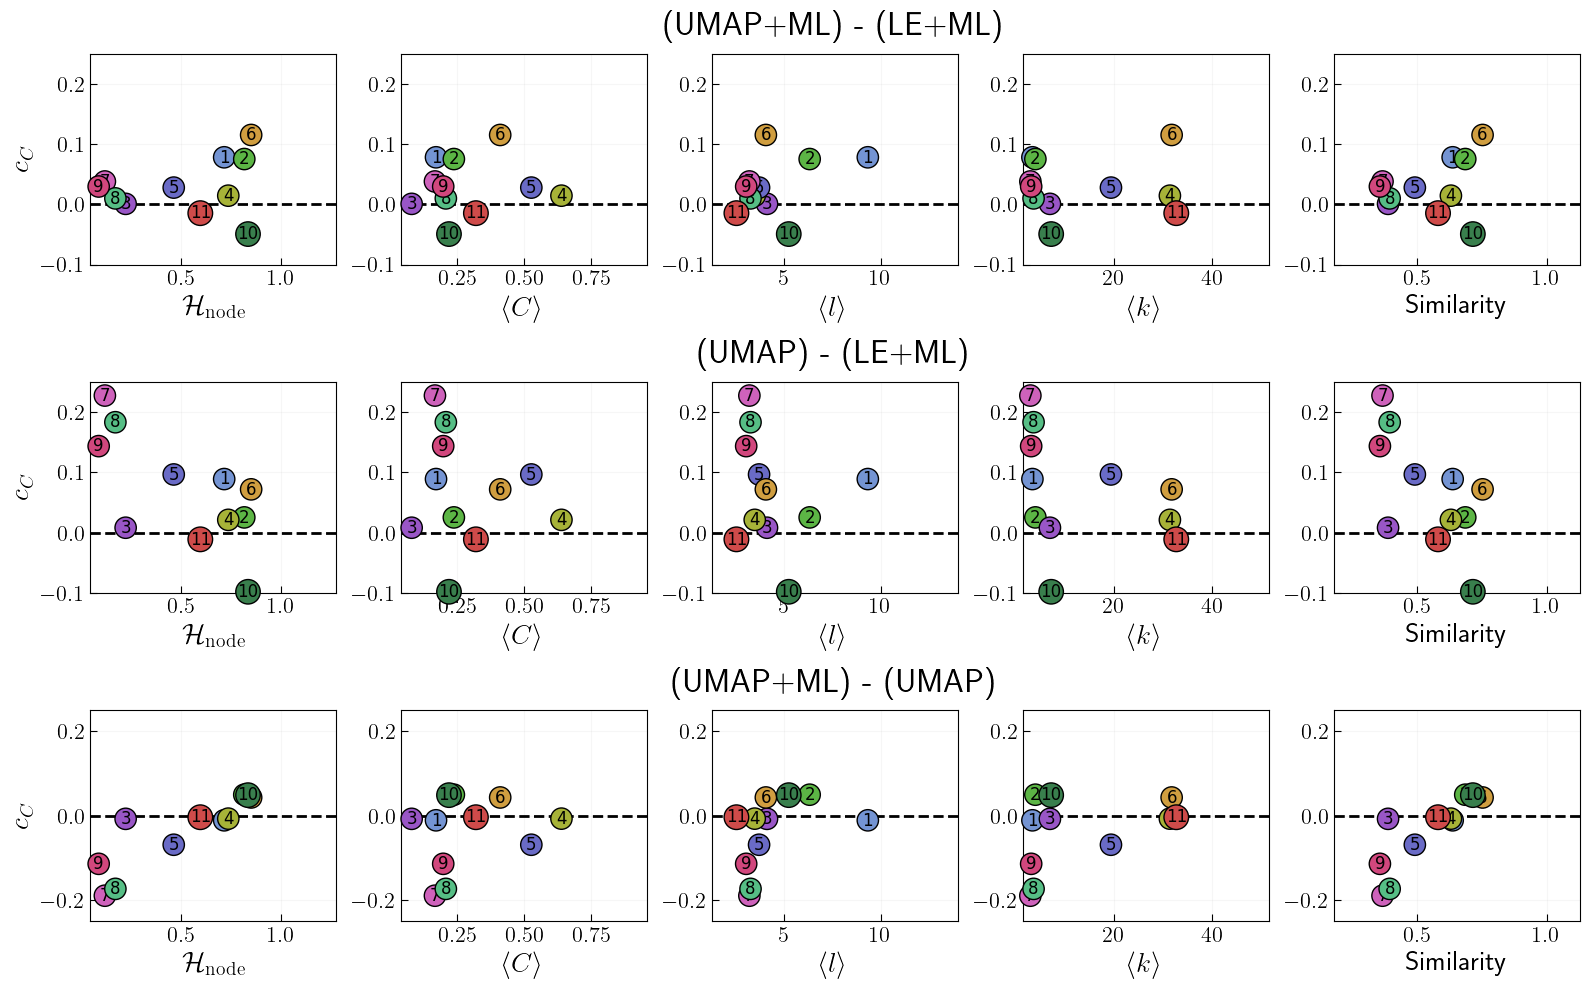

time: 1.52 s (started: 2023-03-27 11:20:17 +02:00)


In [54]:
def plot_cc_all_options_difference(cc_res, title, ymin=-0.1, ymax=0.25, i=1):
    plt.subplot(3, 5, i)
    plot_cc_per_option(cc_res, 'H_node')
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$\mathcal{H}_{\mathrm{node}}$')
    plt.ylabel(r'$c_C$')
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+1)
    plot_cc_per_option(cc_res, 'C')
    plt.xlabel(r'$\left<C\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+2)
    plot_cc_per_option(cc_res, 'l')
    plt.xlabel(r'$\left<l\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(title, y=1.05)
    
    plt.subplot(3, 5, i+3)
    plot_cc_per_option(cc_res, 'k')
    plt.xlabel(r'$\left<k\right>$')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.subplot(3, 5, i+4)
    plot_cc_per_option(cc_res, 'similarity')
    plt.xlabel(r'Similarity')
    plt.ylim(ymin, ymax)
    plt.axhline(y=0, color='black', linestyle='--')

    
plt.figure(figsize=(16, 10))
plot_cc_all_options_difference(cc_umap_ml - cc_le_ml, title='(UMAP+ML) - (LE+ML)', i=1)
plot_cc_all_options_difference(cc_only_umap - cc_le_ml, title='(UMAP) - (LE+ML)', i=6)
plot_cc_all_options_difference(cc_umap_ml - cc_only_umap, title='(UMAP+ML) - (UMAP)', i=11, ymin=-0.25)

plt.tight_layout()
